# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
#from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [ ]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

In [ ]:
X = pd.get_dummies(X, columns=['mode', 'key','track_genre', 'time_signature'])
X.head()

# Кодирование One-Hot не зависит от масштаба данных.
# Оно может помочь модели уловить взаимосвязи между категориями и целевой переменной.
# Так же позволяет сохранить информацию о категориях в исходных данных.

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,loudness,speechiness,acousticness,...,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,-6.746,0.1430,0.0322,...,0,0,0,0,0,0,0,0,1,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,-17.235,0.0763,0.9240,...,0,0,0,0,0,0,0,0,1,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,-9.734,0.0557,0.2100,...,0,0,0,0,0,0,0,0,1,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,-18.515,0.0363,0.9050,...,0,0,0,0,0,0,0,1,0,0
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,-9.681,0.0526,0.4690,...,0,0,0,0,0,0,0,0,1,0


#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7.

In [ ]:
exclude_columns = ["artists", "album_name", "track_name", "key", "track_genre", "mode", "key", "time_signature"]

included_columns = [d for d in X.columns if all(k not in d for k in exclude_columns)]

X_train, X_test, y_train, y_test = train_test_split(X[included_columns], y, test_size=0.25, random_state=7)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train

,popularity,duration_ms,explicit,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
7124,30,214213,False,0.4690,-6.722,0.0348,0.298000,0.000117,0.2660,0.8260,187.124
101347,40,88649,False,0.0832,-19.851,0.1560,0.000003,0.780000,0.3490,0.0000,78.754
70140,55,234226,False,0.7280,-8.725,0.0309,0.014800,0.001320,0.4850,0.3630,123.960
73606,43,476675,False,0.6960,-12.063,0.0403,0.157000,0.887000,0.1290,0.0359,118.035
38529,28,146747,False,0.5070,-3.578,0.0450,0.064700,0.000004,0.3000,0.6030,124.026
...,...,...,...,...,...,...,...,...,...,...,...
104003,0,181978,False,0.4800,-4.013,0.0412,0.169000,0.000000,0.0711,0.4520,89.890
10742,11,412066,False,0.2320,-4.721,0.0667,0.000543,0.041900,0.0983,0.6330,163.923
49689,21,280000,False,0.3900,-5.979,0.0496,0.006440,0.021300,0.4990,0.0450,146.087
58564,23,221213,False,0.6020,-3.831,0.0660,0.000030,0.945000,0.0917,0.5710,145.003


#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей!

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled_const, y_train)
y_pred_linear = linear_regression.predict(X_test_scaled_const)

ridge_model = sm.OLS(y_train, X_train_scaled_const).fit_regularized(L1_wt=0, alpha=0.03)
y_pred_ridge = ridge_model.predict(exog=X_test_scaled_const)

lasso_model = sm.OLS(y_train, X_train_scaled_const).fit_regularized(alpha=0.05)
y_pred_lasso = lasso_model.predict(exog=X_test_scaled_const)

enet_model = sm.OLS(y_train, X_train_scaled_const).fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.4)
y_pred_enet = enet_model.predict(exog=X_test_scaled_const)

print(f"Linear Regression RMSE = {mean_squared_error(y_test, y_pred_linear, squared=False)}")
print(f"Linear Regression R^2 = {1 - mean_squared_error(y_test, y_pred_linear) / np.var(y_test)}")

ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = 1 - (ridge_rmse ** 2 / np.var(y_test))
print(f"Ridge RMSE = {ridge_rmse}")
print(f"Ridge R^2 = {ridge_r2}")

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = 1 - (lasso_rmse ** 2 / np.var(y_test))
print(f"Lasso RMSE = {lasso_rmse}")
print(f"Lasso R^2 = {lasso_r2}")

enet_rmse = mean_squared_error(y_test, y_pred_enet, squared=False)
enet_r2 = 1 - (enet_rmse ** 2 / np.var(y_test))
print(f"Elastic Net RMSE = {enet_rmse}")
print(f"Elastic Net R^2 = {enet_r2}")

Linear Regression RMSE = 0.12185674515925117
Linear Regression R^2 = 0.7636551517233063
Ridge RMSE = 0.12328615979422748
Ridge R^2 = 0.758077844794015
Lasso RMSE = 0.154930535710214
Lasso R^2 = 0.6179492665266193
Elastic Net RMSE = 0.1228046824192958
Elastic Net R^2 = 0.7599637433557603


#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference(["artists", "album_name", "track_name"])], y, test_size=0.25, random_state=7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled_const, y_train)
y_pred_linear = linear_regression.predict(X_test_scaled_const)

ridge_model = sm.OLS(y_train, X_train_scaled_const).fit_regularized(L1_wt=0, alpha=0.03)
y_pred_ridge = ridge_model.predict(exog=X_test_scaled_const)

lasso_model = sm.OLS(y_train, X_train_scaled_const).fit_regularized(alpha=0.05)
y_pred_lasso = lasso_model.predict(exog=X_test_scaled_const)

enet_model = sm.OLS(y_train, X_train_scaled_const).fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.4)
y_pred_enet = enet_model.predict(exog=X_test_scaled_const)

print(f"Linear Regression RMSE = {mean_squared_error(y_test, y_pred_linear, squared=False)}")
print(f"Linear Regression R^2 = {1 - mean_squared_error(y_test, y_pred_linear) / np.var(y_test)}")

ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = 1 - (ridge_rmse ** 2 / np.var(y_test))
print(f"Ridge RMSE = {ridge_rmse}")
print(f"Ridge R^2 = {ridge_r2}")

lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = 1 - (lasso_rmse ** 2 / np.var(y_test))
print(f"Lasso RMSE = {lasso_rmse}")
print(f"Lasso R^2 = {lasso_r2}")

enet_rmse = mean_squared_error(y_test, y_pred_enet, squared=False)
enet_r2 = 1 - (enet_rmse ** 2 / np.var(y_test))
print(f"Elastic Net RMSE = {enet_rmse}")
print(f"Elastic Net R^2 = {enet_r2}")
# Добавили категориальные признаки, расширили пространство признаков, в котором модель ищет зависимости.
# Это может увеличить сложность модели и позволить ей лучше адаптироваться к данным.

Linear Regression RMSE = 0.1118627232079096
Linear Regression R^2 = 0.8008328228602072
Ridge RMSE = 0.1135334663664264
Ridge R^2 = 0.7948390089689181
Lasso RMSE = 0.15493053570944856
Lasso R^2 = 0.6179492665303944
Elastic Net RMSE = 0.12018233354992755
Elastic Net R^2 = 0.7701056714887343


#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы

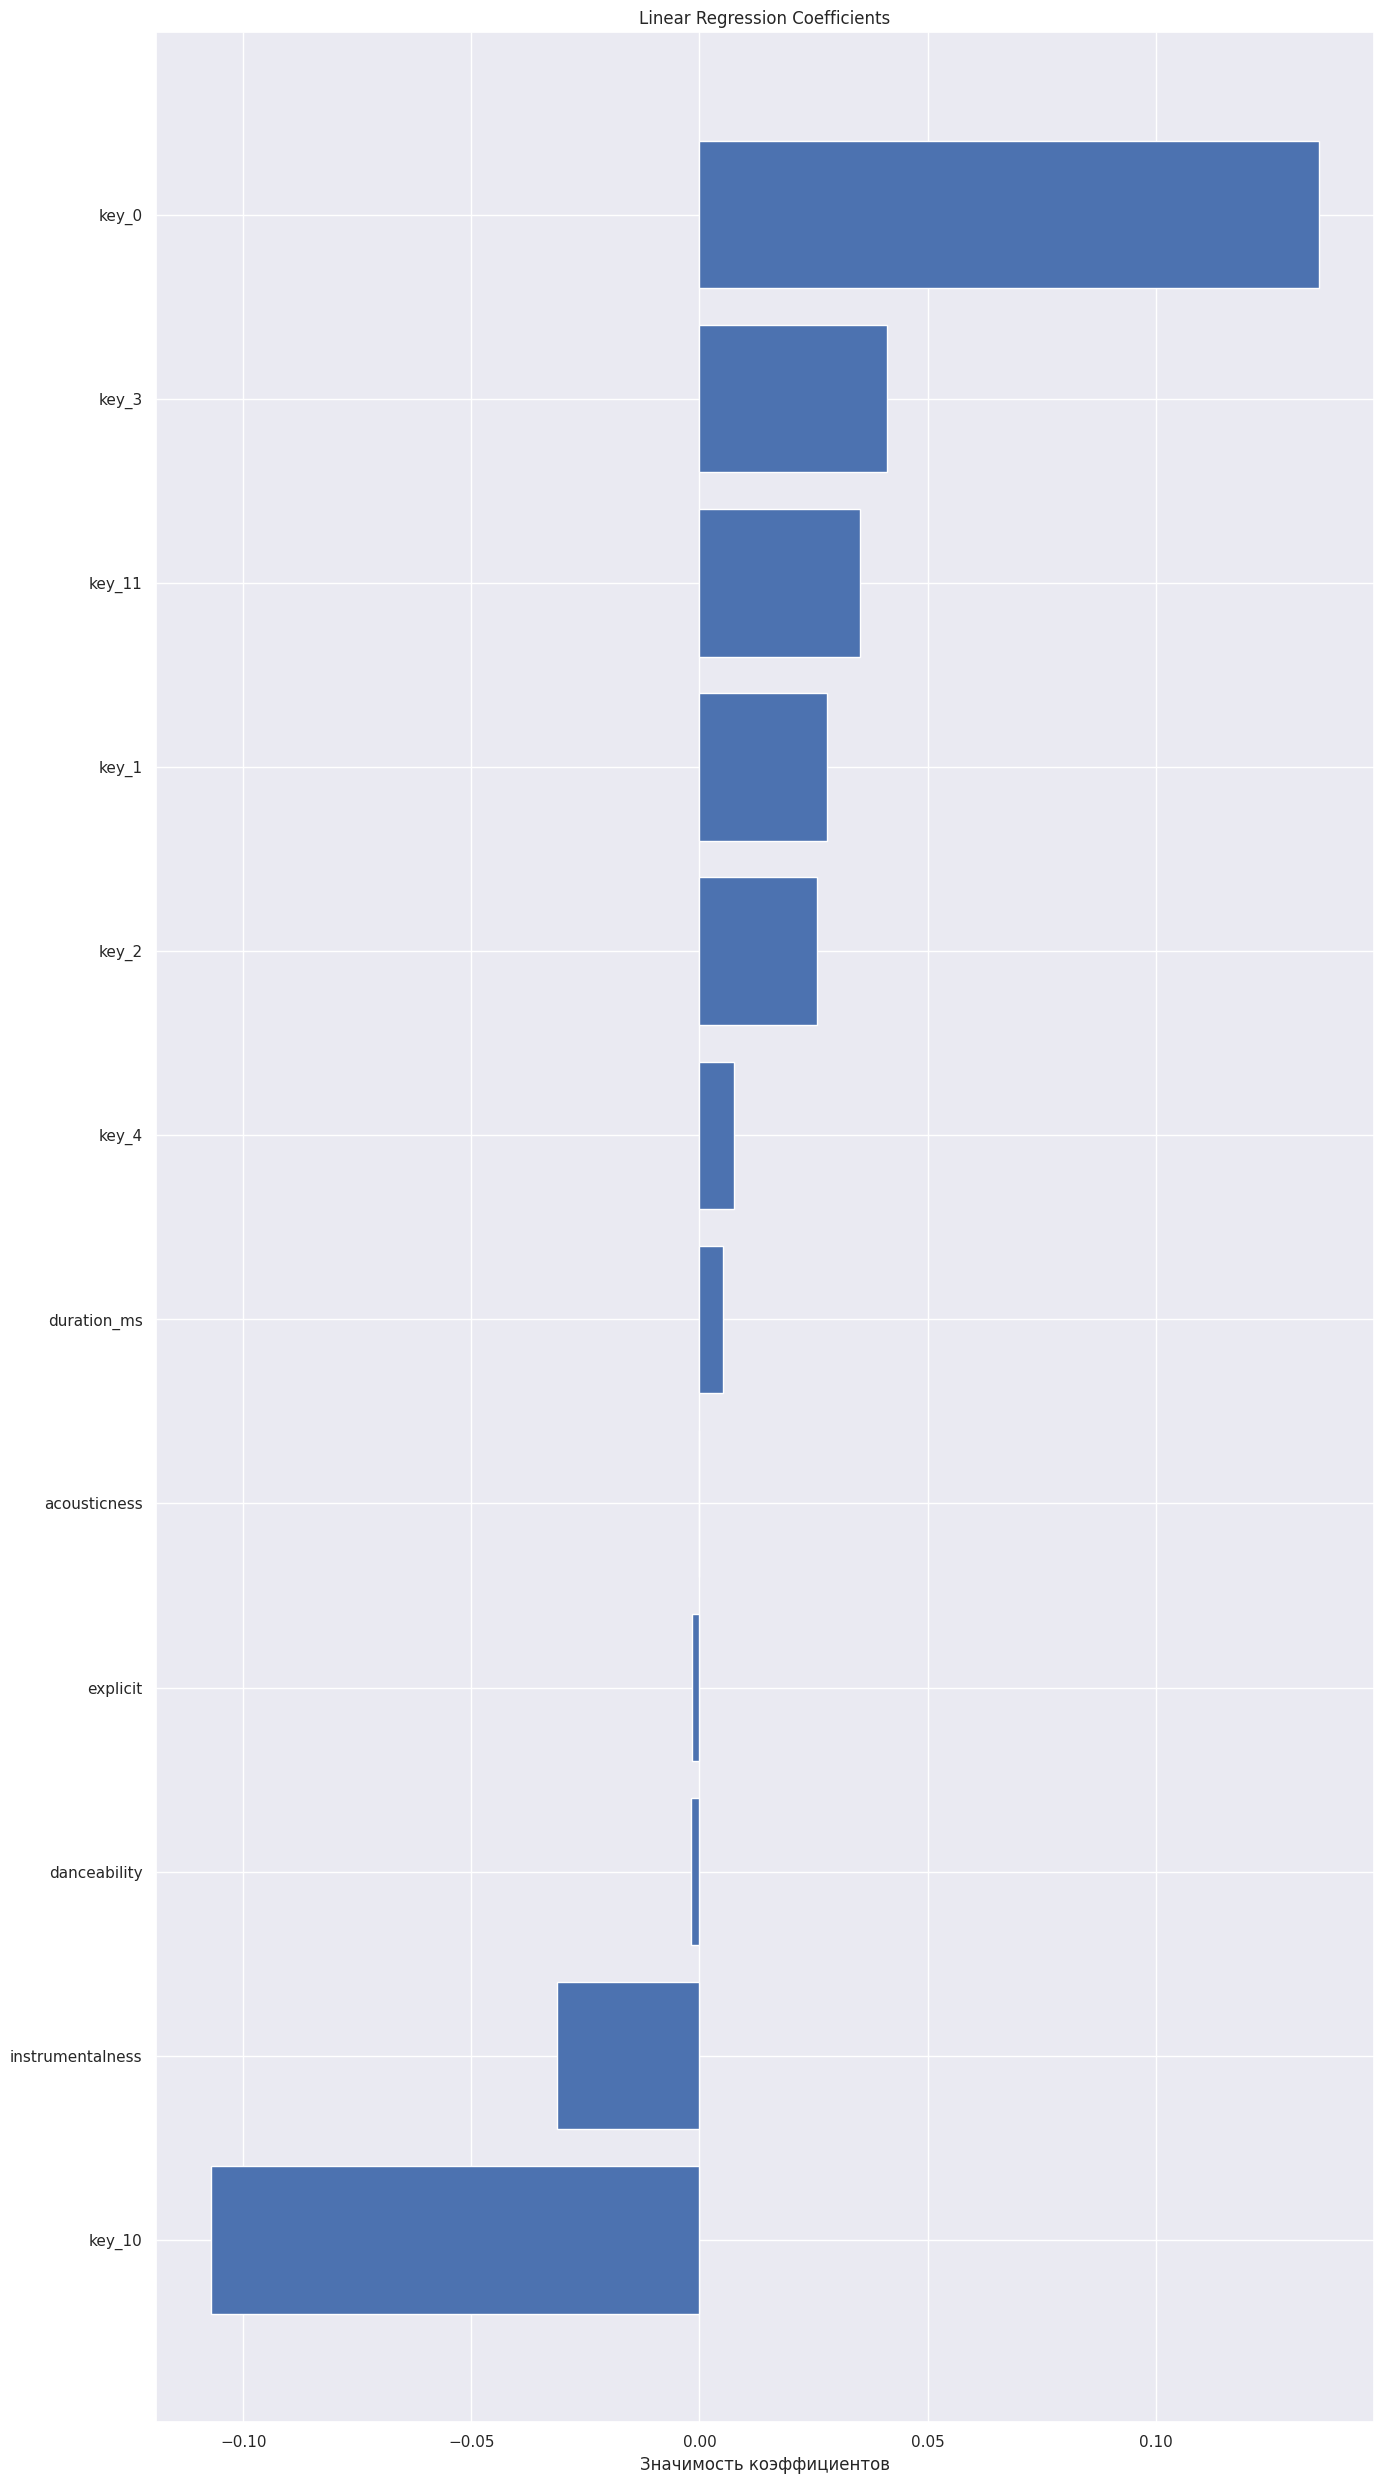

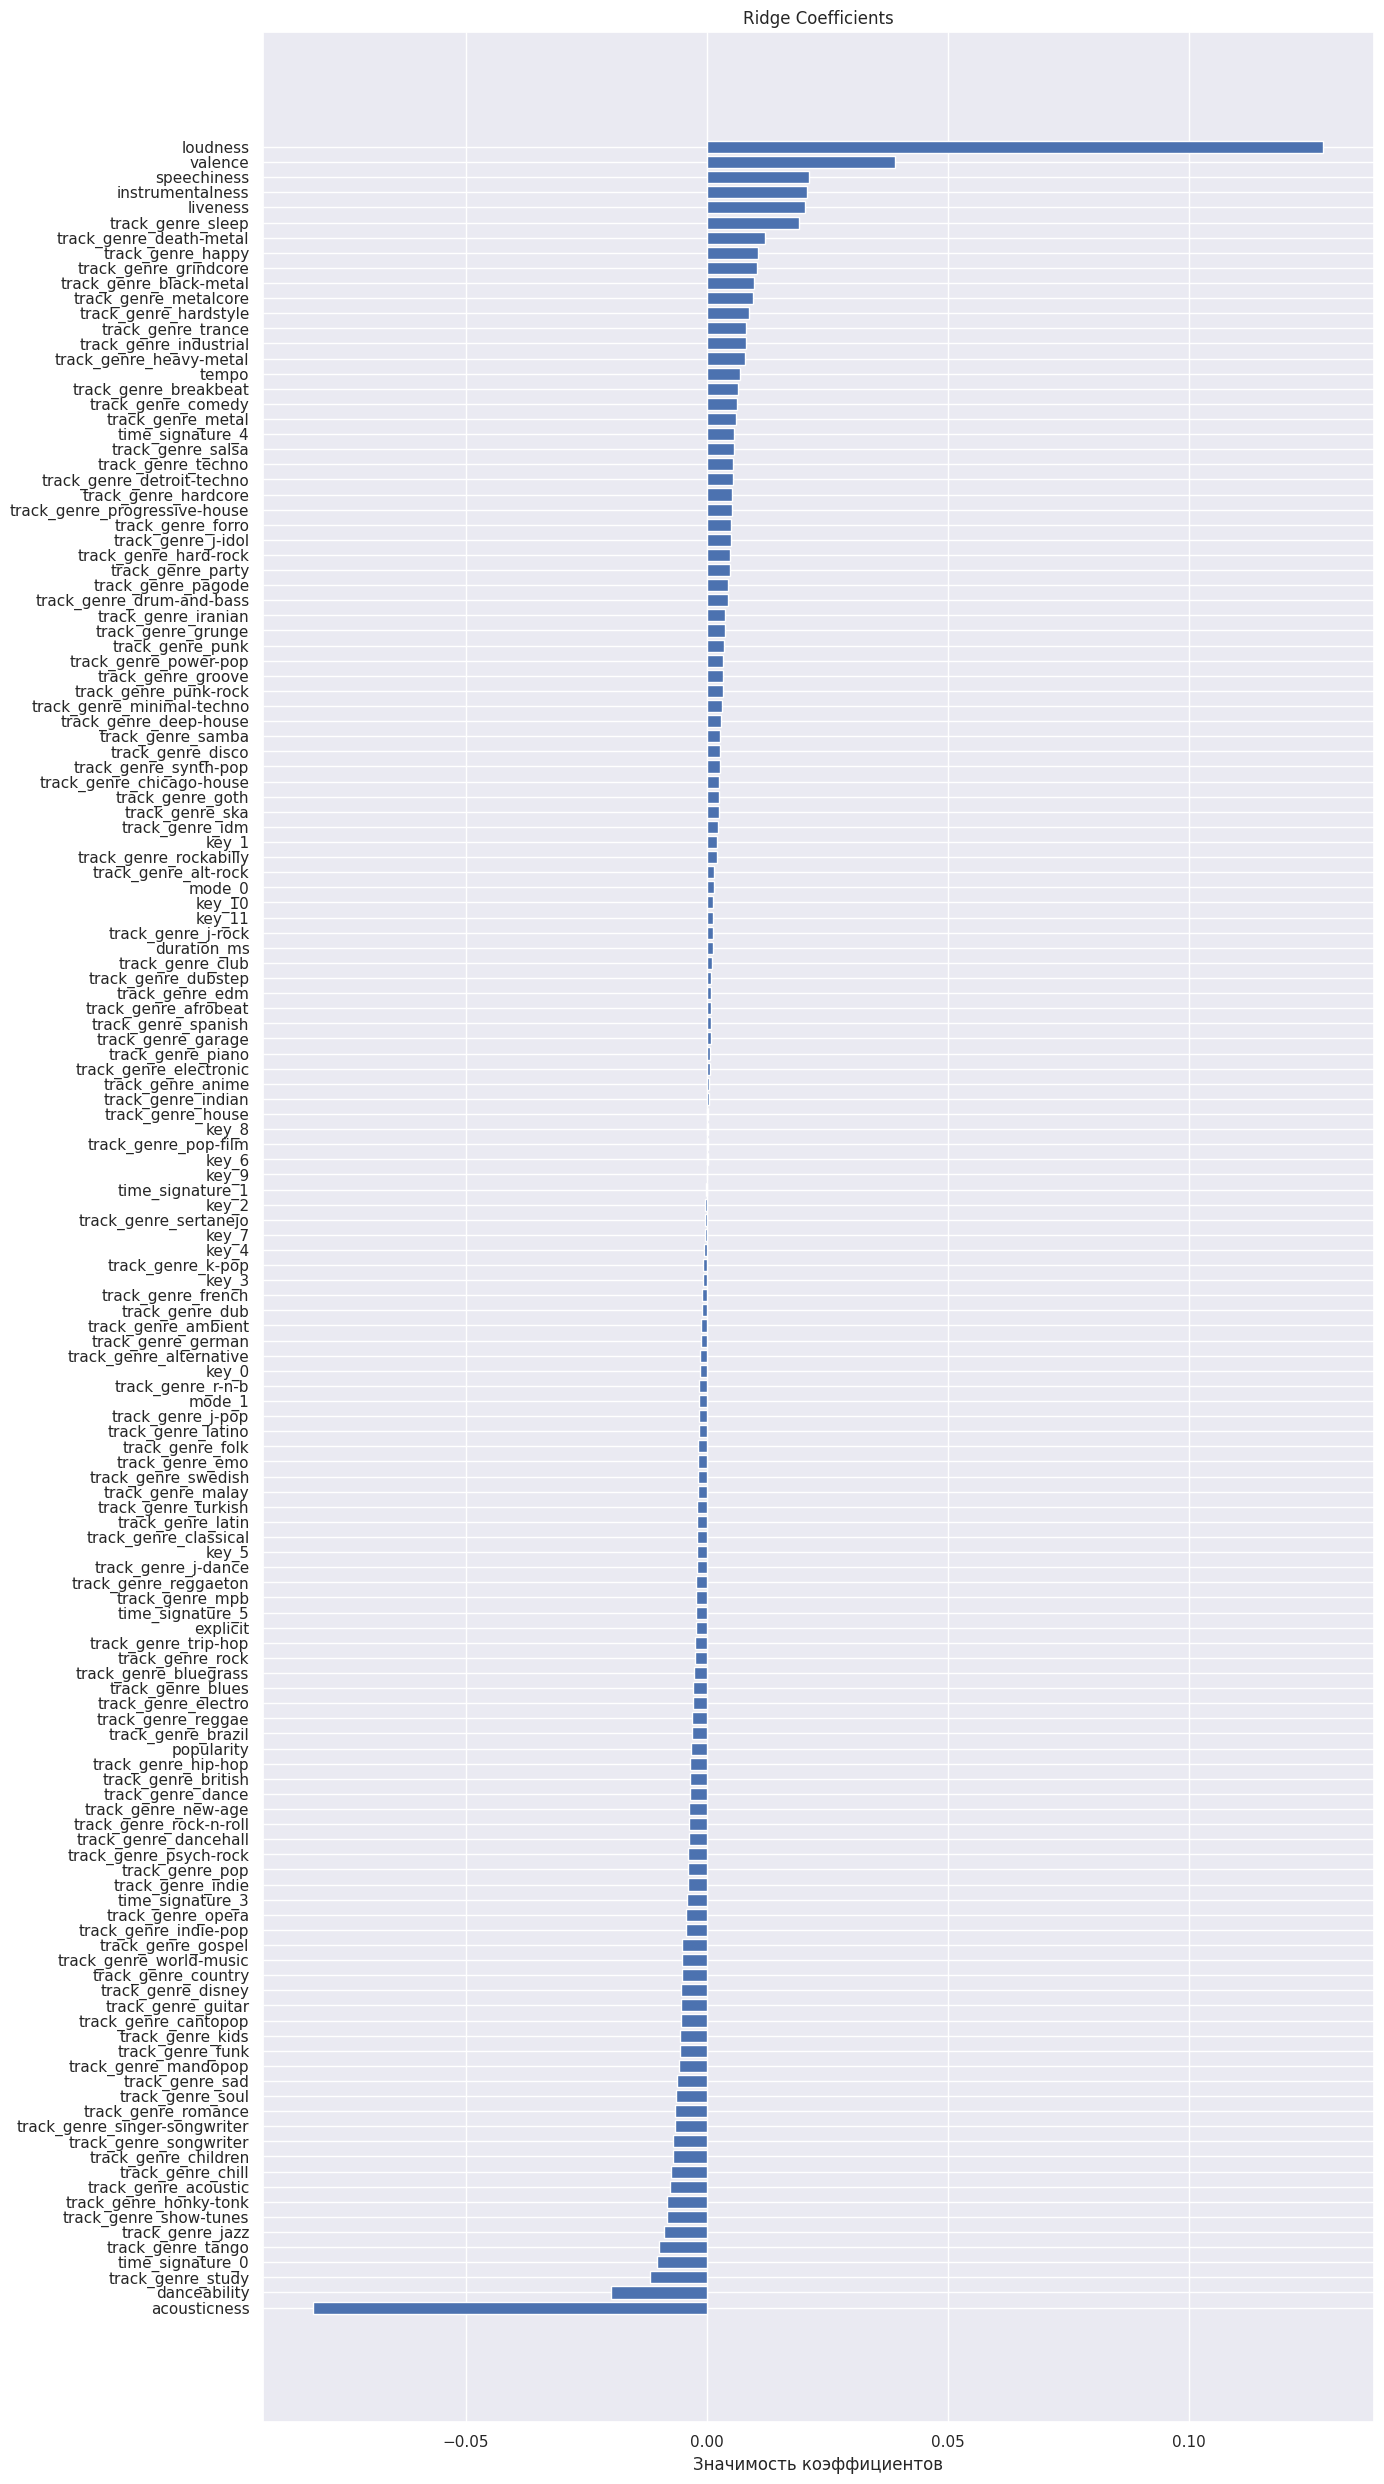

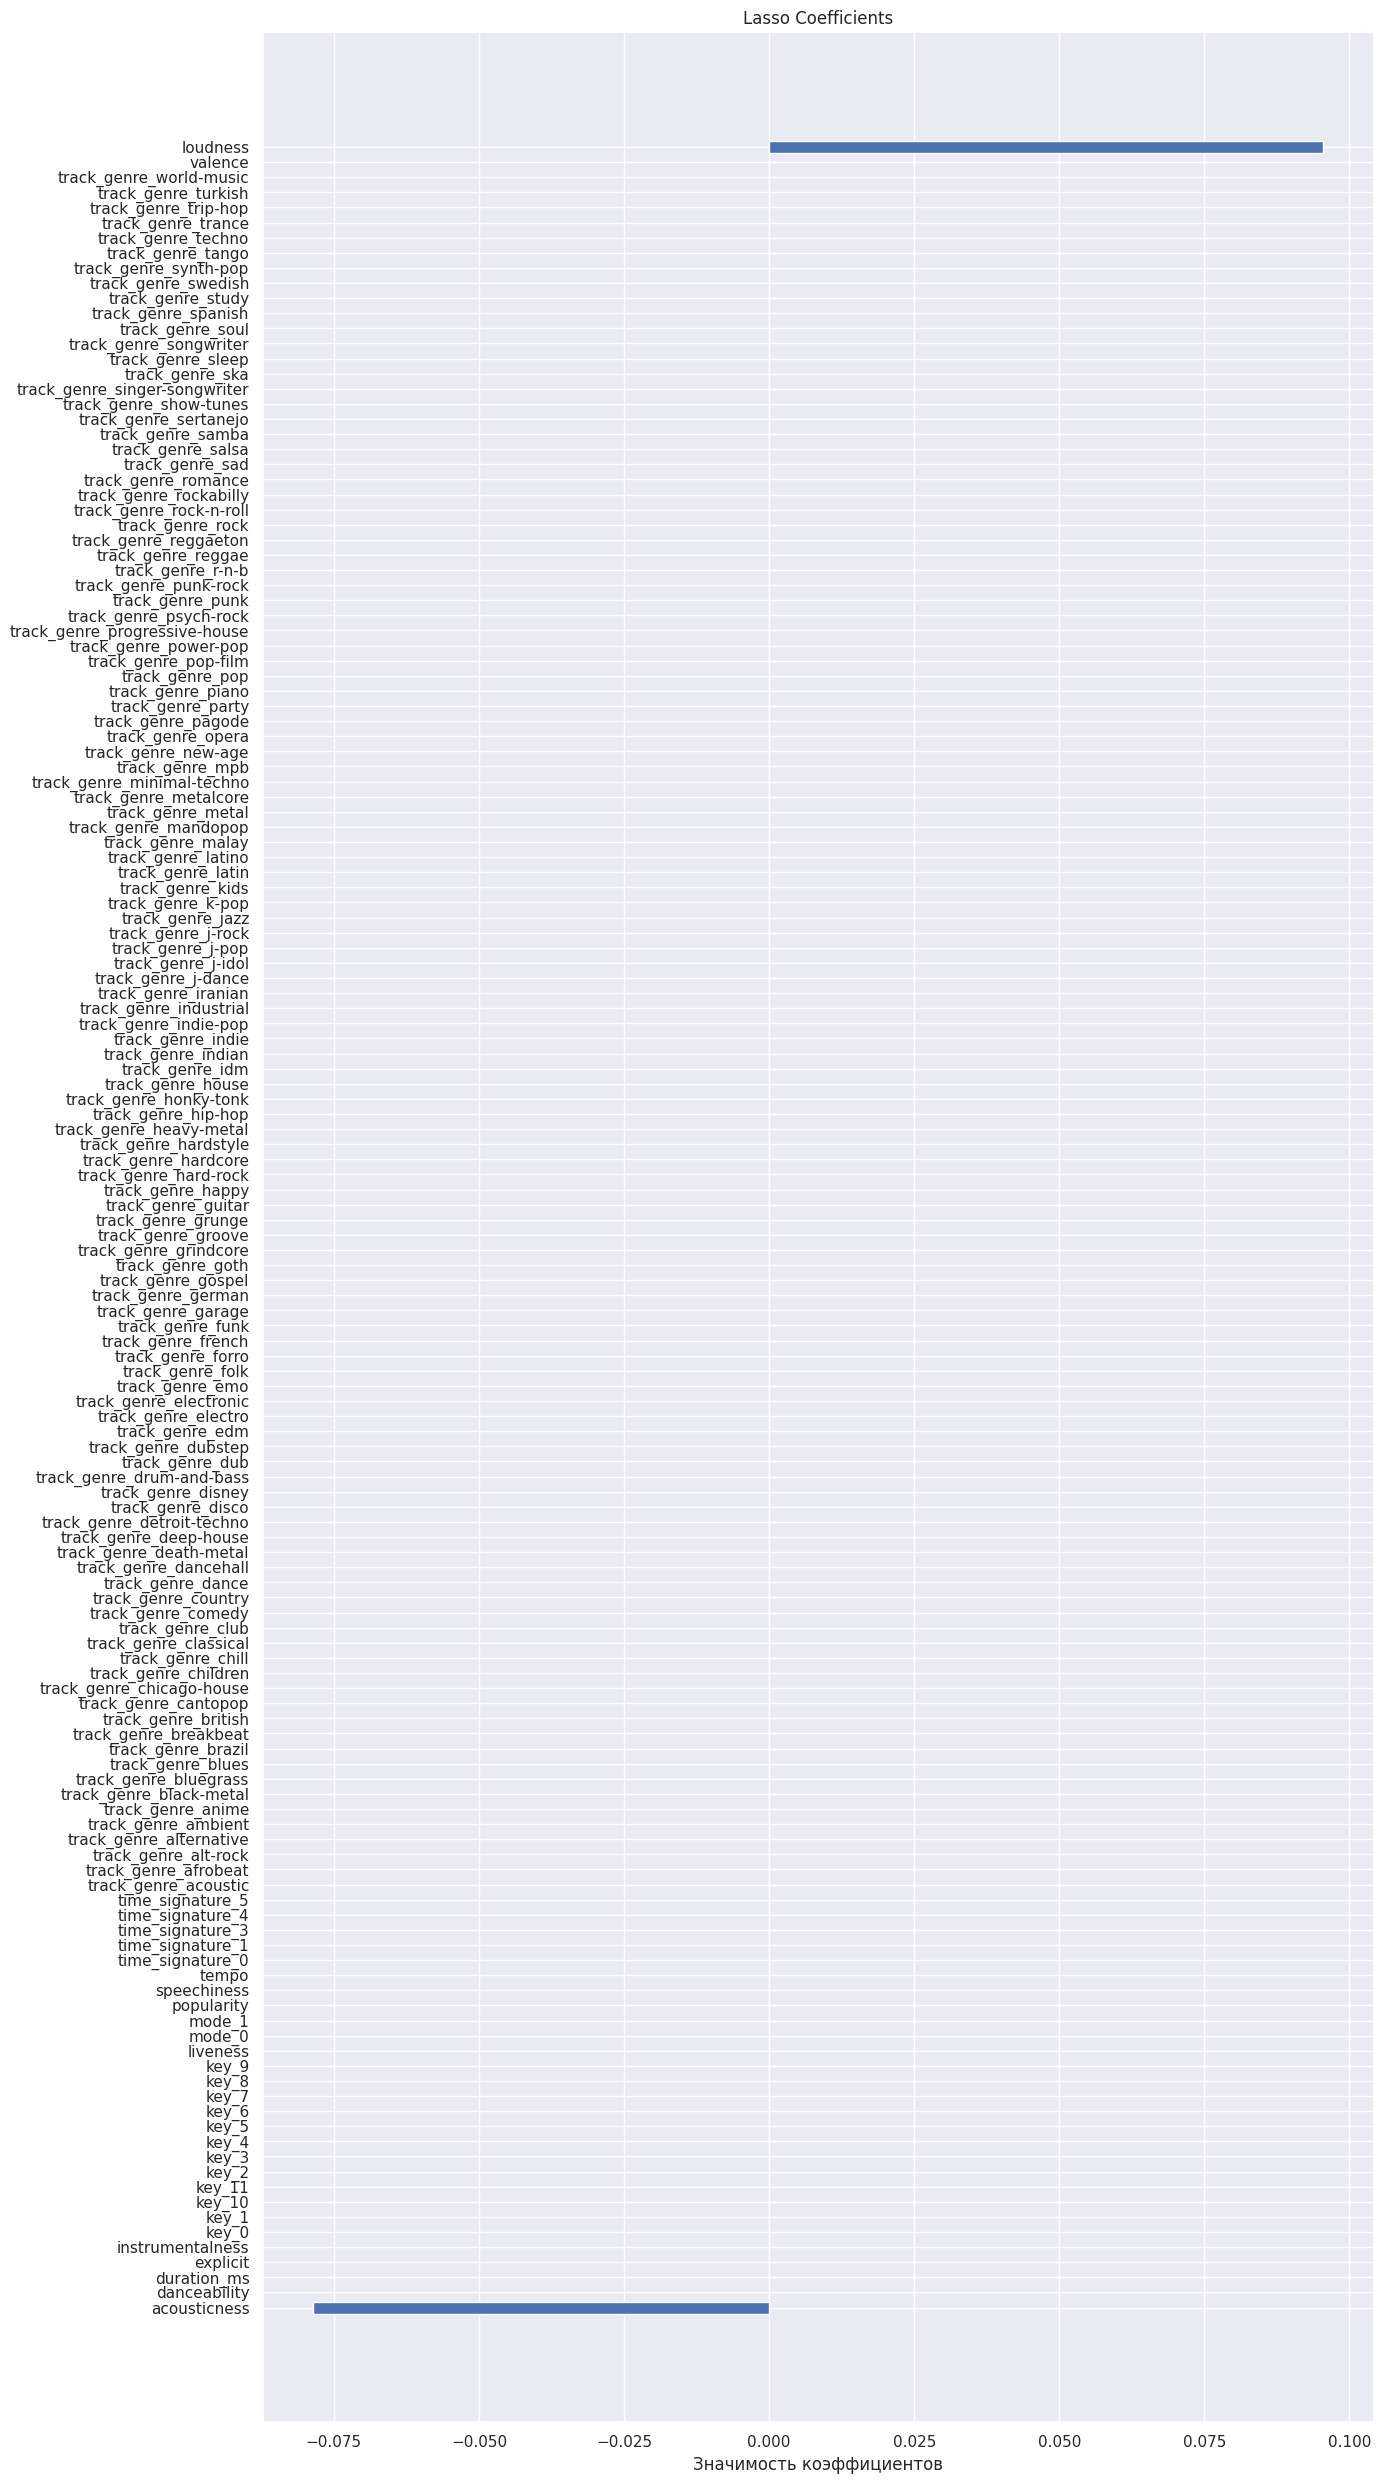

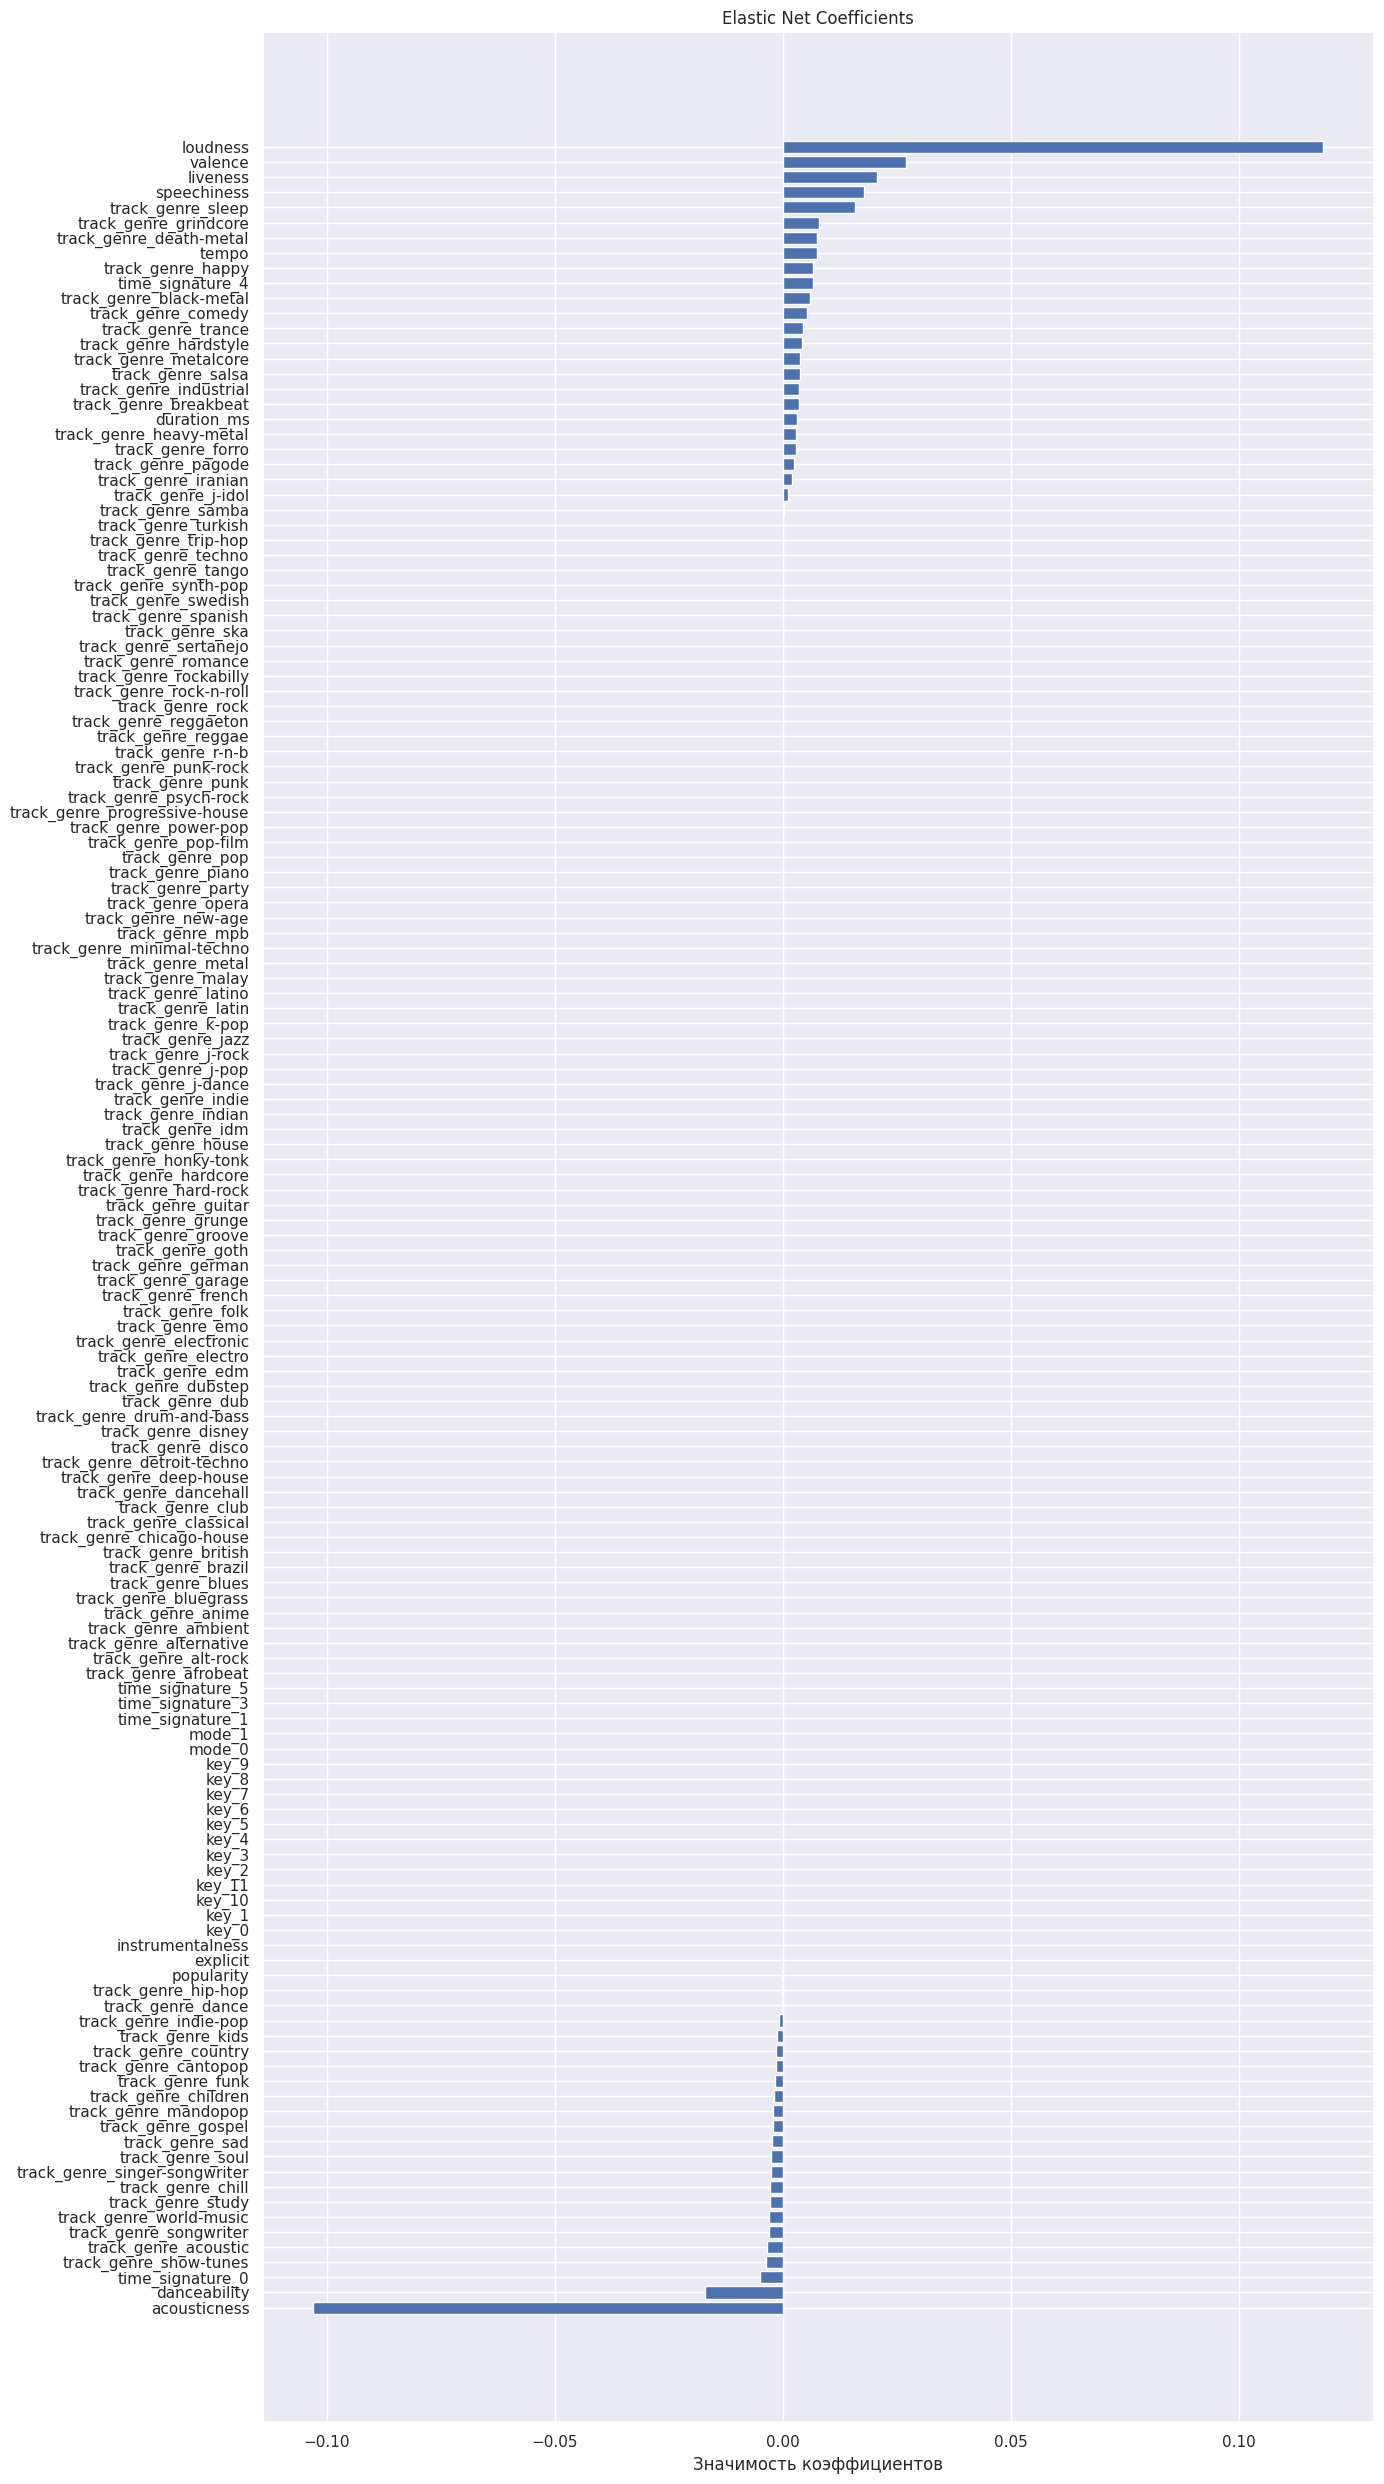

In [ ]:
def plot_weights(features, weights, title):
    sorted_weights, sorted_features = zip(*sorted(zip(weights, features)))
    plt.figure(figsize=(14, 25))
    plt.barh(range(len(sorted_weights)), sorted_weights, align='center')
    plt.yticks(range(len(sorted_weights)), sorted_features, rotation=0)
    plt.xlabel("Значимость коэффициентов")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_weights(X_train.columns, linreg_model.coef_, "Linear Regression Coefficients")
plot_weights(X_train.columns, ridge_model.params[1:], "Ridge Coefficients")
plot_weights(X_train.columns, lasso_model.params[1:], "Lasso Coefficients")
plot_weights(X_train.columns, enet_model.params[1:], "Elastic Net Coefficients")

Lasso и Elasric Net сильнее зануляют признаки.
Важные параметры: loudness, valense, liveness


#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

In [ ]:
# Elimination by P-value
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
X = pd.get_dummies(X, columns=['track_genre', 'time_signature', 'mode', 'key'])


numeric_features = X.select_dtypes(include=[np.number]).columns

max_p = 0.03
all_features = numeric_features
while True:
    X_train = X[all_features]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled = sm.add_constant(X_train_scaled)

    rg = sm.OLS(y, X_train_scaled).fit()


    p_values = rg.pvalues[1:]


    max_p_feature_index = np.argmax(p_values)
    max_p_value = p_values[max_p_feature_index]

    if max_p_value <= max_p:
        break


    feature_to_remove = all_features[max_p_feature_index]
    all_features = [feature for feature in all_features if feature != feature_to_remove]

# Полученные признаки после отбора
selected_features = all_features
print("Selected Features:", selected_features)

Selected Features: ['popularity', 'duration_ms', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre_acoustic', 'track_genre_alternative', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_electro', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'track_genre_grindcore', 'track_genre_groove', 'track_genre_grunge', 

Удалили признаки, начиная с самых незначимых, пока p-value для всех признаков не удовлетворило установленному критерию значимости. Отобранные величины являются наиболее информативными и статистически значимыми для построения модели регрессии и объяснения целевой переменной


#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])

alphas = np.logspace(-4, 3, 50)  # Промежуток для параметра α

lasso = Lasso()
param_grid = [{'alpha': alphas}]

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha = {best_alpha}")

Best alpha = 0.0007196856730011522


## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [ ]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights (default is None)
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = []  # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        n, d = X.shape
        self.w = self.w0 if self.w0 is not None else np.random.randn(d)

        for iteration in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            self.w -= self.alpha * gradient
            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)

            if np.linalg.norm(gradient) < self.tolerance:
                break

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return X.dot(self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        n, d = X.shape
        y_pred = X.dot(self.w)
        error = y_pred - y
        gradient = X.T.dot(error) / n
        return gradient

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np array of shape (l)
        ---
        output: float
        """
        n, d = X.shape
        y_pred = X.dot(self.w)
        error = y_pred - y
        loss = 0.5 * np.mean(error ** 2)
        return loss


#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

In [ ]:
data = pd.read_csv('dataset.csv')

target_variable = 'energy'
X = data.drop([target_variable], axis=1)
X = pd.get_dummies(X, columns=['track_genre', 'time_signature', 'mode', 'key'])

excluded_categorical_features = ["artists", "album_name", "track_name"]
X = X[X.columns.difference(excluded_categorical_features + selected_features)]

X_train, X_test, y_train, y_test = train_test_split(X, data[target_variable], test_size=0.25, random_state=7)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinReg(w0=np.zeros(len(X_train.columns)))
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE = {rmse}")
print(f"R^2 = {r2}")

RMSE = 0.6848249866652437
R^2 = -6.464593943669219


Хуже чем ожидалось, особенно r2

#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

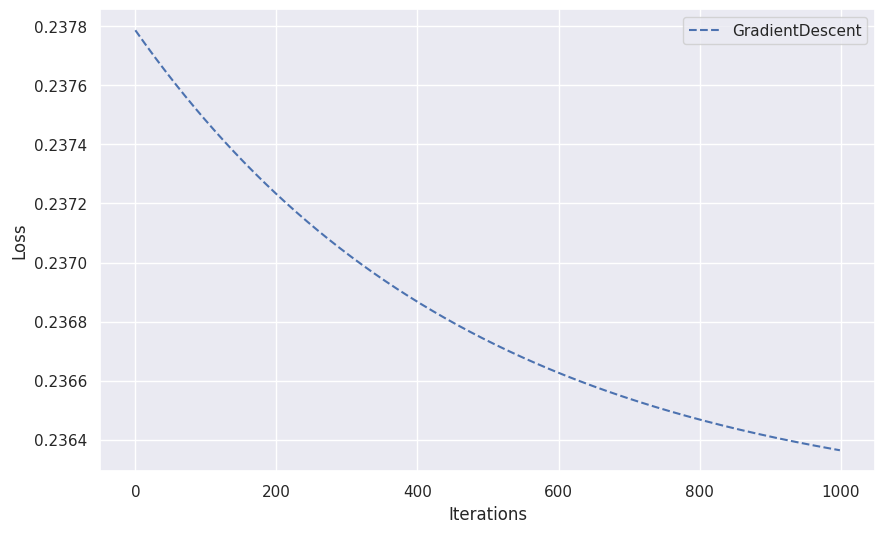

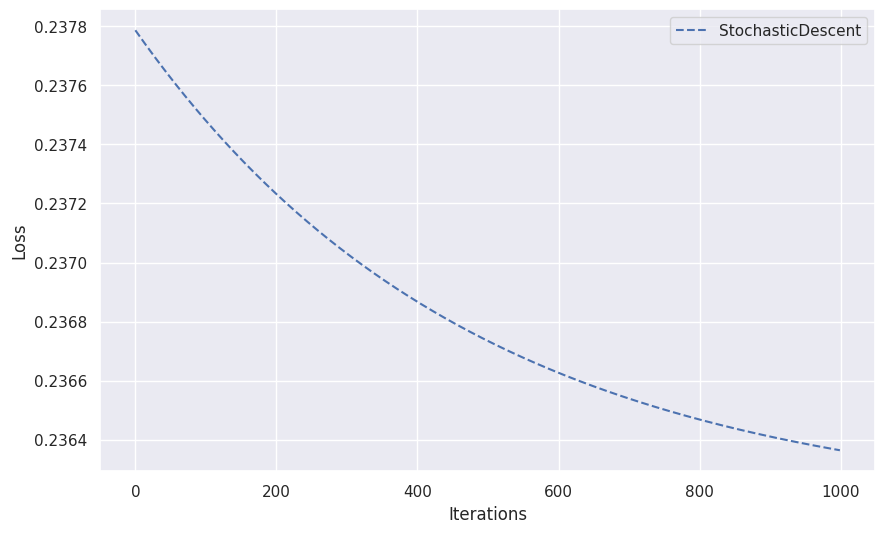

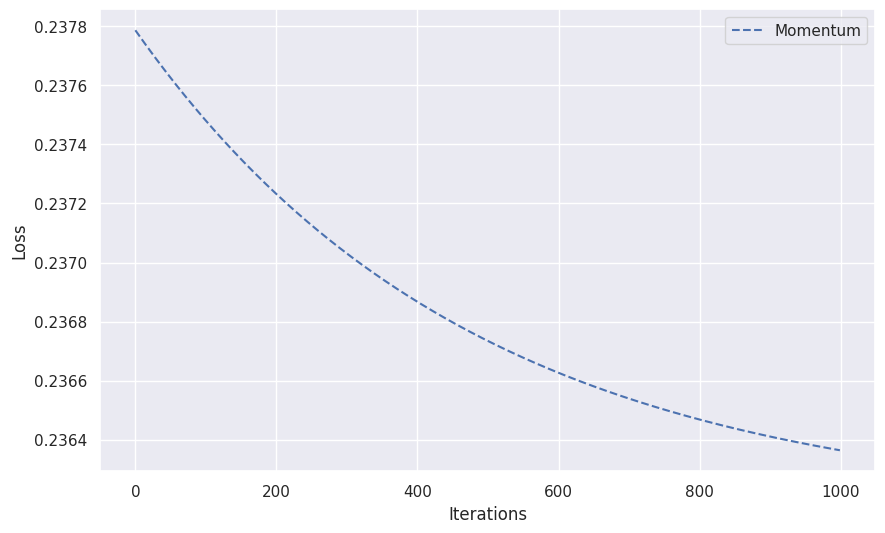

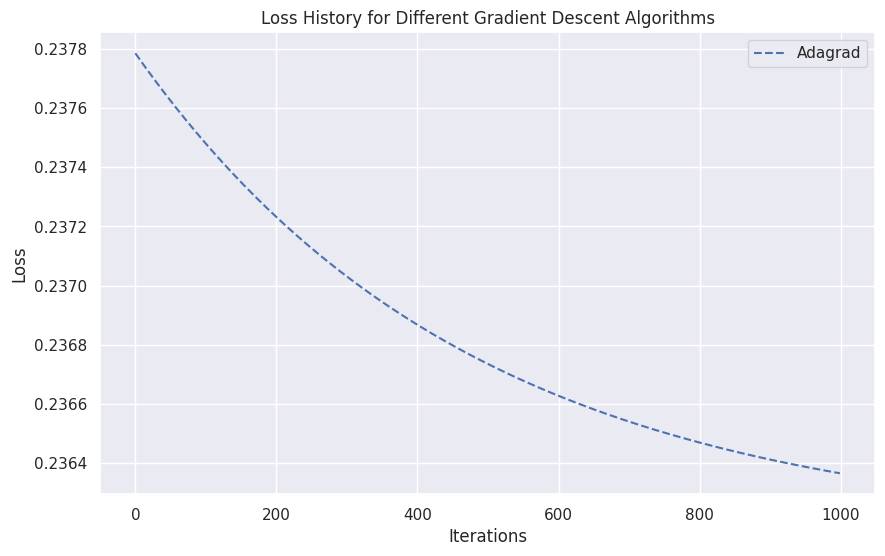

In [ ]:
loss_data = pd.DataFrame()

for gd_type in ['GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad']:
    model = LinReg(w0=np.zeros(len(X_train.columns)), gd_type=gd_type)
    model.fit(X_train_scaled, y_train)


    current_data = pd.DataFrame({
        'Iterations': range(len(model.loss_history)),
        'Loss': model.loss_history,
        'GD Type': gd_type
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=current_data, x='Iterations', y='Loss', label=gd_type, linestyle='dashed')

plt.title("Loss History for Different Gradient Descent Algorithms")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.show()
#